In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats


#loading data
CSV_PATH = '../data/sierraleone-bumbuna'
df = pd.read_csv(CSV_PATH)
df.columns = df.columns.str.strip()

print(f"Rows: {len(df):,}  |  Columns: {df.shape[1]}")
df.head()


Rows: 525,600  |  Columns: 19


Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-10-30 00:01 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.1  0.0     0.0   
1  2021-10-30 00:02 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.2  0.0     0.0   
2  2021-10-30 00:03 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.2  0.0     0.0   
3  2021-10-30 00:04 -0.7  0.0 -0.8   0.0   0.0  21.9  99.3  0.0     0.0   
4  2021-10-30 00:05 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.3  0.0     0.0   

   WSstdev   WD  WDstdev    BP  Cleaning  Precipitation  TModA  TModB  \
0      0.0  0.0      0.0  1002         0            0.0   22.3   22.6   
1      0.0  0.0      0.0  1002         0            0.0   22.3   22.6   
2      0.0  0.0      0.0  1002         0            0.0   22.3   22.6   
3      0.0  0.0      0.0  1002         0            0.1   22.3   22.6   
4      0.0  0.0      0.0  1002         0            0.0   22.3   22.6   

   Comments  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN

In [12]:
# Select numeric columns and show describe()
num_cols = df.select_dtypes(include=[np.number]).columns
summary_stats = df[num_cols].describe().T  # transpose for readability
display(summary_stats)

count          mean         std         min         25%  \
GHI            525600.0  3.828005e+02  217.285140    0.000000  356.700000   
DNI            525600.0  1.749529e+02  193.599354    0.000000  115.300000   
DHI            525600.0  2.284010e+02  104.605970    0.000000  224.700000   
ModA           525600.0  2.030537e+02  296.231357    0.000000    0.000000   
ModB           525600.0  1.937179e+02  283.126225    0.000000    0.000000   
Tamb           525600.0  2.631939e+01    4.398605   12.300000   23.100000   
RH             525600.0  7.944886e+01   20.520775    9.900000   68.700000   
WS             525600.0  1.106696e+00    1.157374    0.000000    0.000000   
WSgust         525600.0  1.644945e+00    1.509352    0.000000    0.000000   
WSstdev        525600.0  3.638229e-01    0.295000    0.000000    0.000000   
WD             525600.0  1.330447e+02  114.284792    0.000000    0.000000   
WDstdev        525600.0  7.172220e+00    7.535093    0.000000    0.000000   
BP             525600.0  9.998765e+02    2.104419  993.000000  999.000000   
Cleaning       525600.0  9.665145e-04    0.031074    0.000000    0.000000   
Precipitation  525600.0  4.805936e-03    0.047556    0.000000    0.000000   
TModA          525600.0  3.250426e+01   12.434899   10.700000   23.500000   
TModB          525600.0  3.259309e+01   12.009161   11.100000   23.800000   
z_GHI          264465.0 -1.240189e-16    1.000002   -1.331657   -0.896338   
z_DNI          259248.0 -1.754102e-17    1.000002   -0.902127   -0.897545   
z_DHI          262472.0  2.101807e-16    1.000002   -1.561579   -0.799696   
z_ModA         525600.0  1.803394e-16    1.000001   -0.686758   -0.686758   
z_ModB         525600.0  2.832437e-16    1.000001   -0.685782   -0.685782   
z_WS           525600.0 -1.038236e-17    1.000001   -0.924846   -0.924846   
z_WSgust       525600.0  3.205554e-16    1.000001   -1.046105   -1.046105   

                       50%          75%          max  
GHI             359.400000   362.200000  1320.000000  
DNI             115.300000   115.300000   946.000000  
DHI             224.700000   224.700000   680.100000  
ModA              3.200000   353.800000  1109.200000  
ModB              2.900000   338.500000  1064.000000  
Tamb             25.300000    29.400000    39.900000  
RH               85.400000    96.700000   100.000000  
WS                0.800000     1.900000     4.800000  
WSgust            1.600000     2.600000     6.400000  
WSstdev           0.400000     0.600000     4.100000  
WD              161.500000   234.100000   360.000000  
WDstdev           6.200000    12.000000    98.400000  
BP             1000.000000  1001.000000  1006.000000  
Cleaning          0.000000     0.000000     1.000000  
Precipitation     0.000000     0.000000     2.400000  
TModA            26.600000    40.900000    72.800000  
TModB            26.900000    41.300000    70.400000  
z_GHI            -0.153213     0.813471     3.582076  
z_DNI            -0.461833     0.860194     2.710345  
z_DHI            -0.052567     0.701269     4.420816  
z_ModA           -0.674794     0.508005     4.321607  
z_ModB           -0.674013     0.509834     4.413066  
z_WS             -0.279293     0.689037    14.568431  
z_WSgust         -0.056650     0.561759    13.733879

In [13]:
#missing value report

missing_report = pd.DataFrame({
    "missing_count": df.isna().sum(),
    "missing_pct": (df.isna().mean() * 100).round(2)
}).sort_values("missing_pct", ascending=False)

display(missing_report)

missing_count  missing_pct
z_DNI                  266352        50.68
z_DHI                  263128        50.06
z_GHI                  261135        49.68
Timestamp                   0         0.00
outlier_ModA                0         0.00
outlier_ModB                0         0.00
z_WS                        0         0.00
outlier_WS                  0         0.00
z_WSgust                    0         0.00
outlier_WSgust              0         0.00
imputed_GHI                 0         0.00
imputed_DNI                 0         0.00
imputed_DHI                 0         0.00
imputed_ModA                0         0.00
imputed_ModB                0         0.00
imputed_WS                  0         0.00
imputed_WSgust              0         0.00
imputed_Tamb                0         0.00
imputed_TModA               0         0.00
imputed_TModB               0         0.00
imputed_RH                  0         0.00
imputed_BP                  0         0.00
imputed_WD                  0         0.00
z_ModB                      0         0.00
outlier_DHI                 0         0.00
z_ModA                      0         0.00
WSstdev                     0         0.00
DNI                         0         0.00
DHI                         0         0.00
ModA                        0         0.00
ModB                        0         0.00
Tamb                        0         0.00
RH                          0         0.00
WS                          0         0.00
WSgust                      0         0.00
WD                          0         0.00
GHI                         0         0.00
WDstdev                     0         0.00
BP                          0         0.00
Cleaning                    0         0.00
Precipitation               0         0.00
TModA                       0         0.00
TModB                       0         0.00
outlier_GHI                 0         0.00
outlier_DNI                 0         0.00
clean_flag                  0         0.00

In [14]:
# List columns with >5% nulls
high_nulls = missing_report[missing_report["missing_pct"] > 5]
display(high_nulls)

# Also print just the column names as a quick list
print("Columns with >5% nulls:", high_nulls.index.tolist())

missing_count  missing_pct
z_DNI         266352        50.68
z_DHI         263128        50.06
z_GHI         261135        49.68

Columns with >5% nulls: ['z_DNI', 'z_DHI', 'z_GHI']


In [15]:

# 1) Drop columns that are 100% missing (e.g., "Comments")
fully_null = df.columns[df.isna().mean() == 1.0]
if len(fully_null) > 0:
    print("Dropping fully-null columns:", fully_null.tolist())
    df = df.drop(columns=fully_null)

# 2) Define columns we care about
key_cols_all = ["GHI","DNI","DHI","ModA","ModB","WS","WSgust","Tamb","TModA","TModB","RH","BP","WD"]
zscore_cols_all = ["GHI","DNI","DHI","ModA","ModB","WS","WSgust"]

key_cols = [c for c in key_cols_all if c in df.columns]
z_cols  = [c for c in zscore_cols_all if c in df.columns]

print("Key columns present:", key_cols)
print("Z-score columns present:", z_cols)

# 3) Ensure numeric types (non-numeric -> NaN)
for c in key_cols:
    df[c] = pd.to_numeric(df[c], errors="coerce")

raw_df = df.copy() 

Key columns present: ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust', 'Tamb', 'TModA', 'TModB', 'RH', 'BP', 'WD']
Z-score columns present: ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']


In [16]:
#Flag physically impossible values and set them to NaN

invalid_any = pd.Series(False, index=df.index)
violation_counts = {}

def mark_invalid(col, mask, reason):
    global invalid_any
    if col in df.columns:
        violation_counts[reason] = int(mask.sum())
        invalid_any = invalid_any | mask
        df.loc[mask, col] = np.nan

# Irradiance and wind speeds must be >= 0
for c in ["GHI","DNI","DHI","WS","WSgust"]:
    if c in df.columns:
        m = df[c] < 0
        mark_invalid(c, m, f"neg_{c}")

# Gust should be >= WS
if "WSgust" in df.columns and "WS" in df.columns:
    m = df["WSgust"] < df["WS"]
    # set WSgust to NaN when it's less than WS (likely faulty gust reading)
    mark_invalid("WSgust", m, "gust_lt_ws")

# Wind direction 0–360
if "WD" in df.columns:
    m = ~df["WD"].between(0, 360)
    mark_invalid("WD", m, "bad_WD")

# Relative humidity 0–100
if "RH" in df.columns:
    m = ~df["RH"].between(0, 100)
    mark_invalid("RH", m, "bad_RH")

# Temperatures in plausible range [-30, 80] C
for c in ["Tamb","TModA","TModB"]:
    if c in df.columns:
        m = ~df[c].between(-30, 80)
        mark_invalid(c, m, f"out_of_range_{c}")

print("Invalid-value fixes:", violation_counts)

Invalid-value fixes: {'neg_GHI': 0, 'neg_DNI': 0, 'neg_DHI': 0, 'neg_WS': 0, 'neg_WSgust': 0, 'gust_lt_ws': 622, 'bad_WD': 0, 'bad_RH': 0, 'out_of_range_Tamb': 0, 'out_of_range_TModA': 0, 'out_of_range_TModB': 0}


In [17]:
#Z-scores for outliers (|Z| > 3), then set those outliers to NaN

def safe_zscore(s: pd.Series):
    s = s.astype(float)
    mu = s.mean(skipna=True)
    sd = s.std(skipna=True, ddof=0)
    if not np.isfinite(sd) or sd == 0:
        return pd.Series(0.0, index=s.index)
    return (s - mu) / sd

outlier_any = pd.Series(False, index=df.index)
outlier_counts = {}

for c in z_cols:
    z = safe_zscore(df[c])
    df[f"z_{c}"] = z
    out_mask = z.abs() > 3
    df[f"outlier_{c}"] = out_mask
    outlier_counts[c] = int(out_mask.sum())
    # Set outliers to NaN for cleaning
    df.loc[out_mask, c] = np.nan
    outlier_any = outlier_any | out_mask

print("Outliers flagged (|Z|>3):", outlier_counts)
print("Rows with any outlier:", int(outlier_any.sum()))


Outliers flagged (|Z|>3): {'GHI': 4705, 'DNI': 9227, 'DHI': 6307, 'ModA': 390, 'ModB': 503, 'WS': 1709, 'WSgust': 2095}
Rows with any outlier: 20882


In [18]:
# Impute missing values in key columns with median

imputed_any = pd.Series(False, index=df.index)

for c in key_cols:
    med = df[c].median()
    if pd.isna(med):
        print(f"Skipped imputation for {c}: median is NaN (column likely empty).")
        continue
    m = df[c].isna()
    df.loc[m, c] = med
    df[f"imputed_{c}"] = m
    imputed_any = imputed_any | m

# Cleaning flag: any invalid fix OR outlier OR imputation happened
df["clean_flag"] = (invalid_any | outlier_any | imputed_any)

print("Rows cleaned (any fix/impute):", int(df["clean_flag"].sum()), "of", len(df))



Rows cleaned (any fix/impute): 21198 of 525600


In [19]:
#Save cleaned data to the project data folder

import os
os.makedirs("../data", exist_ok=True)

CLEAN_PATH = "../data/sierraleone_clean.csv"
df.to_csv(CLEAN_PATH, index=False)
print("Saved cleaned file to:", CLEAN_PATH)

Saved cleaned file to: ../data/sierraleone_clean.csv


In [20]:
#Load cleaned data and parse Timestamp

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 4)

# Load cleaned CSV (saved earlier)
CLEAN_PATH = "../data/sierraleone_clean.csv"
df = pd.read_csv(CLEAN_PATH)

# Find/standardize the time column
time_col = None
for c in df.columns:
    cl = c.strip().lower()
    if cl in ["timestamp", "datetime", "date", "time"] or "time" in cl or "date" in cl:
        time_col = c
        break

if time_col is None:
    raise ValueError("No time-like column found. Tell me the exact column name for timestamps.")

df = df.rename(columns={time_col: "Timestamp"})
df["Timestamp"] = pd.to_datetime(df["Timestamp"], errors="coerce")
df = df.dropna(subset=["Timestamp"]).sort_values("Timestamp").reset_index(drop=True)

present = [c for c in ["GHI","DNI","DHI","Tamb"] if c in df.columns]
print("Variables available for plotting:", present)


Variables available for plotting: ['GHI', 'DNI', 'DHI', 'Tamb']


In [21]:
#Resample to hourly for cleaner plots (minute-level is too dense)
# Use hourly means for smoother plots; also keep daily for bar charts if needed
df_h = df.set_index("Timestamp")[present].resample("H").mean()
df_d = df.set_index("Timestamp")[present].resample("D").mean()

print("Hourly shape:", df_h.shape, "Daily shape:", df_d.shape)


Hourly shape: (8761, 4) Daily shape: (366, 4)


C:\Users\haymi\AppData\Local\Temp\ipykernel_17068\4291476985.py:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_h = df.set_index("Timestamp")[present].resample("H").mean()


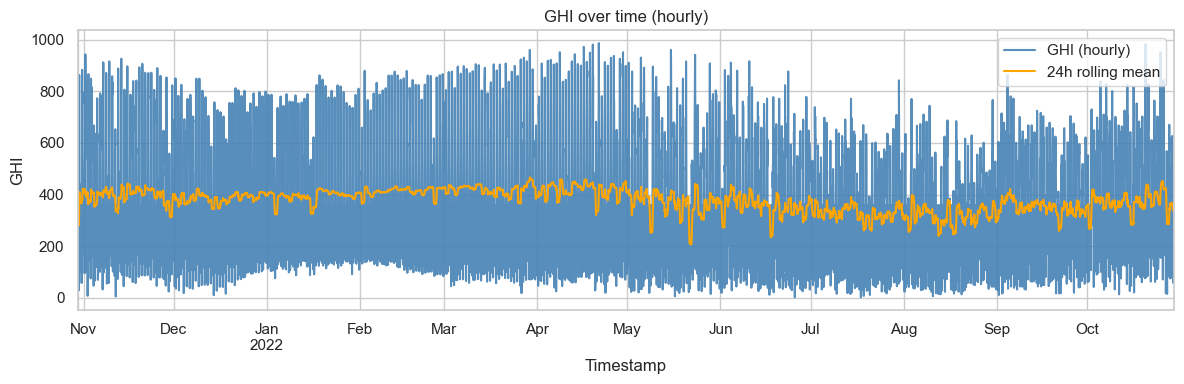

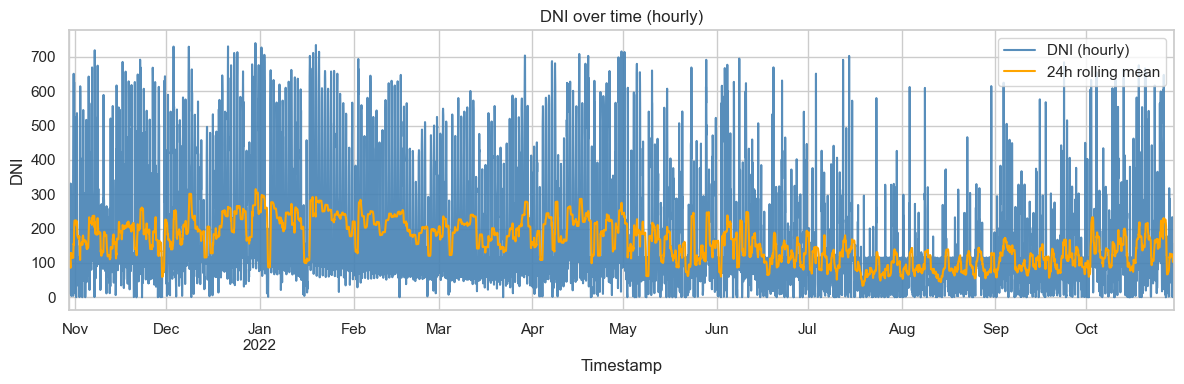

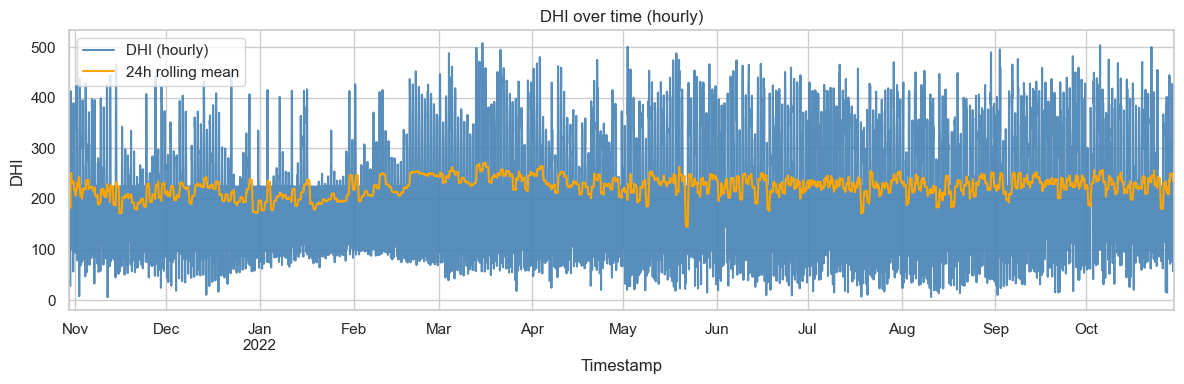

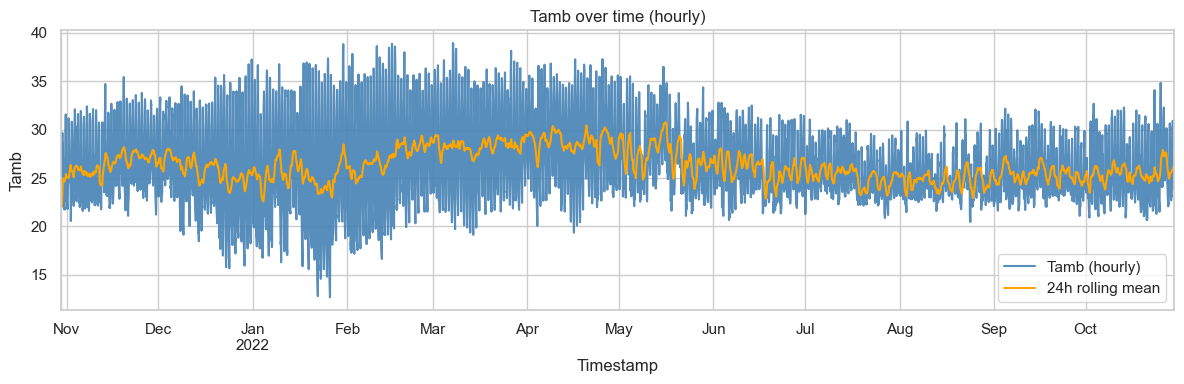

In [22]:
# Line charts of GHI, DNI, DHI, Tamb over time (hourly)
for col in present:
    ax = df_h[col].plot(color="steelblue", alpha=0.9, label=f"{col} (hourly)")
    # 24-hour rolling mean to see trend
    df_h[col].rolling(24, min_periods=1).mean().plot(ax=ax, color="orange", label="24h rolling mean")
    plt.title(f"{col} over time (hourly)")
    plt.xlabel("Timestamp"); plt.ylabel(col)
    plt.legend()
    plt.tight_layout(); plt.show()

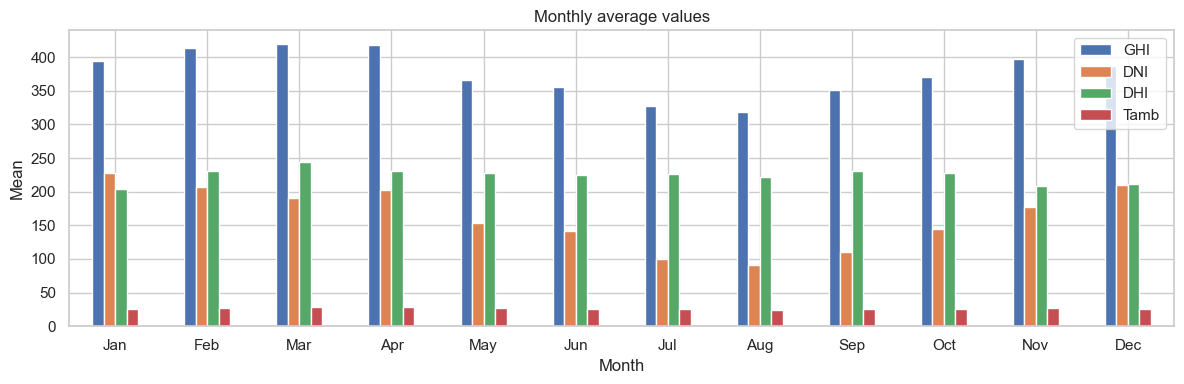

In [23]:
#Monthly patterns (bar charts of monthly averages)
ts = df.copy()
ts["month_num"] = ts["Timestamp"].dt.month
ts["month"] = ts["Timestamp"].dt.month_name().str.slice(stop=3)
order = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]

monthly_mean = ts.groupby("month")[present].mean().reindex(order)
monthly_mean.plot(kind="bar", rot=0)
plt.title("Monthly average values")
plt.xlabel("Month"); plt.ylabel("Mean")
plt.tight_layout(); plt.show()



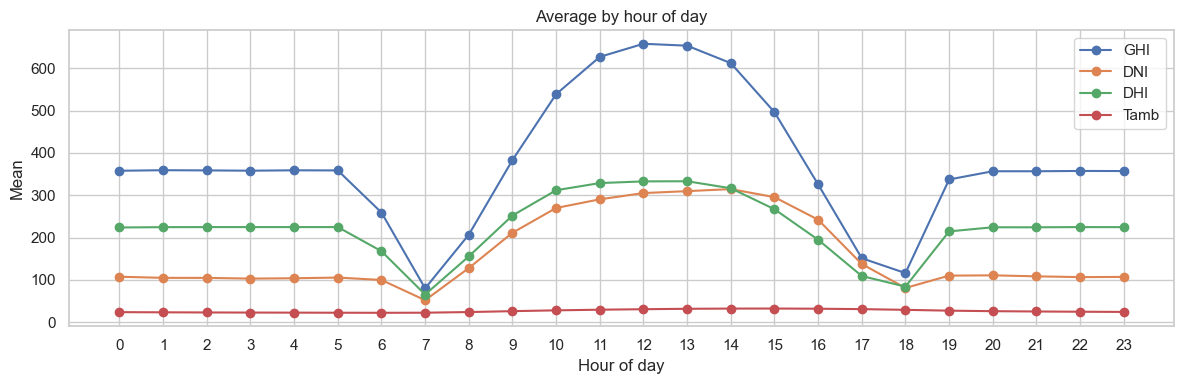

In [24]:
# Diurnal (hour-of-day) patterns across the whole dataset
ts["hour"] = ts["Timestamp"].dt.hour
hourly_pattern = ts.groupby("hour")[present].mean()
hourly_pattern.plot(marker="o")
plt.title("Average by hour of day")
plt.xlabel("Hour of day"); plt.ylabel("Mean")
plt.xticks(range(0,24))
plt.tight_layout(); plt.show()

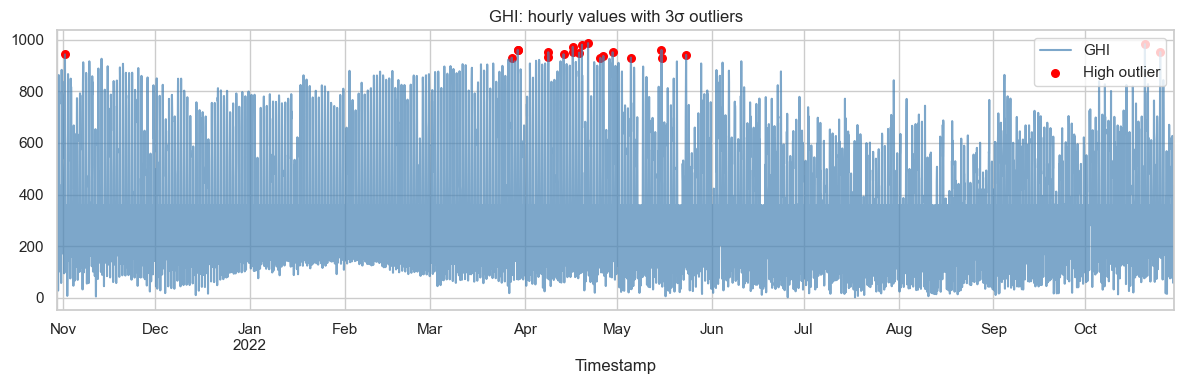

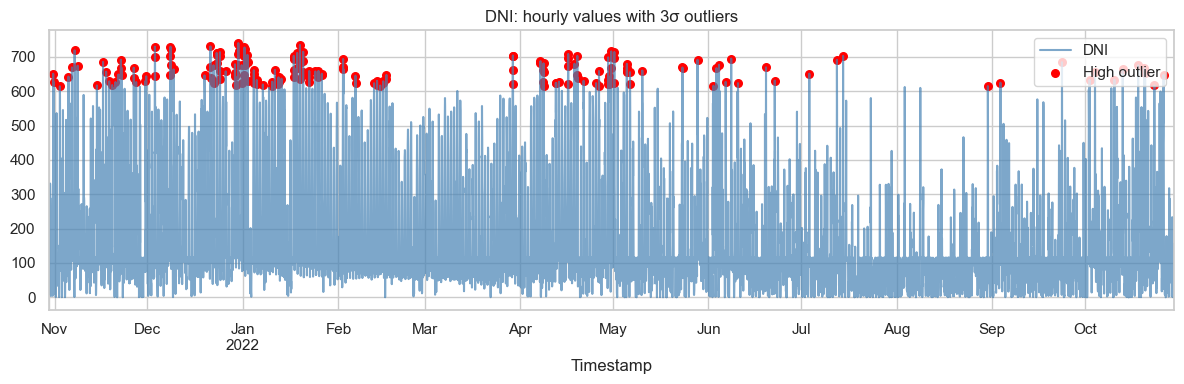

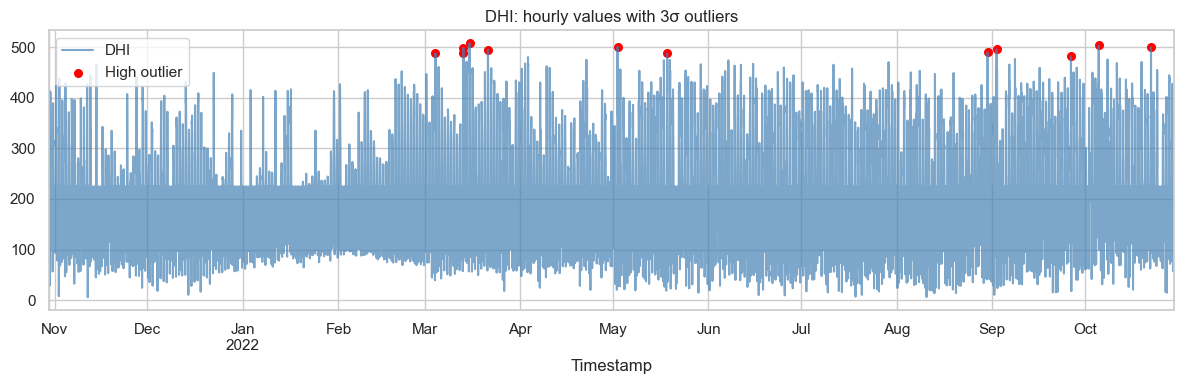

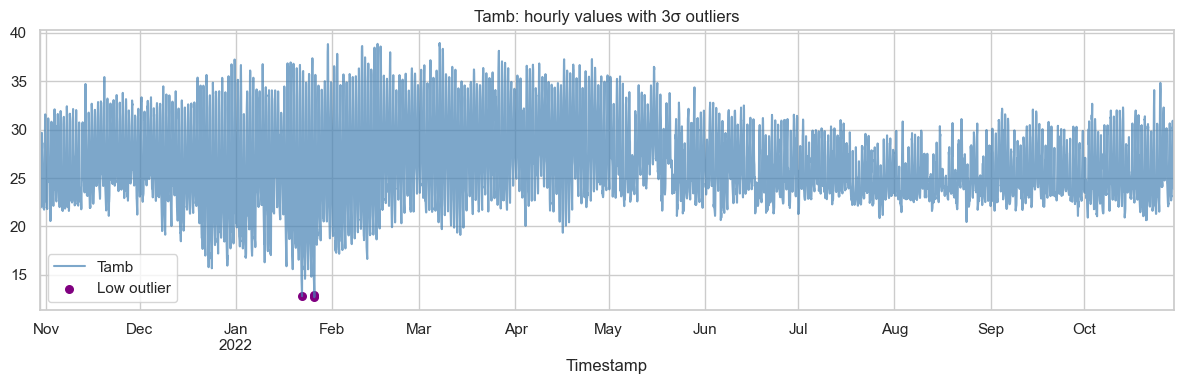

Outlier counts (hourly, |Z|>3): {'GHI': 21, 'DNI': 188, 'DHI': 12, 'Tamb': 3}


In [25]:
#Quick anomaly markers (3σ outliers on hourly series)
import numpy as np
import matplotlib.pyplot as plt

# If 'present' or 'df_h' aren't defined in the current session, recreate them quickly:
if 'present' not in locals():
    present = [c for c in ["GHI","DNI","DHI","Tamb"] if c in df.columns]
if 'df_h' not in locals():
    df_h = df.set_index("Timestamp")[present].resample("H").mean()

anom_counts = {}

for col in present:
    s = df_h[col]
    s_valid = s.dropna()

    # Guard against constant series (std == 0) or empty series
    if s_valid.empty:
        print(f"{col}: no data to analyze.")
        anom_counts[col] = 0
        continue

    mu = s_valid.mean()
    sd = s_valid.std(ddof=0)
    if not np.isfinite(sd) or sd == 0:
        print(f"{col}: no variability (std=0); skipping anomaly marking.")
        anom_counts[col] = 0
        continue

    z = (s_valid - mu) / sd
    high_idx = z[z > 3].index
    low_idx  = z[z < -3].index

    anom_counts[col] = len(high_idx) + len(low_idx)

    ax = s.plot(color="steelblue", alpha=0.7, label=col)
    # Only overlay markers if there are any points
    if len(high_idx) > 0:
        ax.scatter(high_idx, s.loc[high_idx], color="red", s=30, label="High outlier")
    if len(low_idx) > 0:
        ax.scatter(low_idx, s.loc[low_idx], color="purple", s=30, label="Low outlier")

    plt.title(f"{col}: hourly values with 3σ outliers")
    handles, labels = ax.get_legend_handles_labels()
    # Deduplicate legend entries
    unique = dict(zip(labels, handles))
    ax.legend(unique.values(), unique.keys())
    plt.tight_layout(); plt.show()

print("Outlier counts (hourly, |Z|>3):", anom_counts)

In [26]:
#Load cleaned data and ensure clean_flag exists


sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 4)

# Load cleaned
clean_path = "../data/sierraleone_clean.csv"
clean_df = pd.read_csv(clean_path)

# Ensure clean_flag exists (fallback: derive from imputed_*/outlier_* columns)
if "clean_flag" not in clean_df.columns:
    imputed_cols = [c for c in clean_df.columns if c.startswith("imputed_")]
    outlier_cols = [c for c in clean_df.columns if c.startswith("outlier_")]
    if imputed_cols or outlier_cols:
        clean_df["clean_flag"] = clean_df[imputed_cols + outlier_cols].any(axis=1)
    else:
        raise ValueError("clean_flag not found and no imputed_/outlier_ columns to derive it from.")

sensors = [c for c in ["ModA", "ModB"] if c in clean_df.columns]
print("Sensors present:", sensors)
if not sensors:
    raise ValueError("ModA/ModB not found. Tell me the column names for the module sensors.")

Sensors present: ['ModA', 'ModB']


Using in-memory raw_df (pre-clean).
Alignment method: timestamp merge


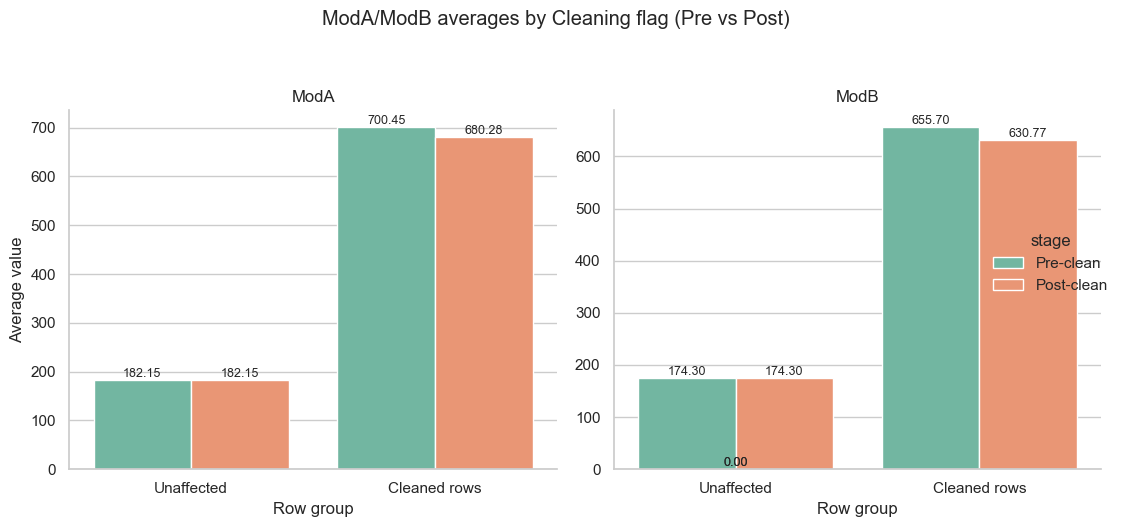

stage sensor         group  Post-clean   Pre-clean      Delta  Delta_pct
0       ModA  Cleaned rows  680.279314  700.451061 -20.171747  -2.879823
1       ModA    Unaffected  182.150078  182.150078   0.000000   0.000000
2       ModB  Cleaned rows  630.766832  655.697028 -24.930196  -3.802091
3       ModB    Unaffected  174.302790  174.302790   0.000000   0.000000

In [27]:
#Get the pre-clean (raw) data

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 4)

# 1) Paths
clean_path = "../data/sierraleone_clean.csv"  

# 2) Load cleaned and ensure clean_flag exists
clean_df = pd.read_csv(clean_path)

imputed_cols = [c for c in clean_df.columns if c.startswith("imputed_")]
outlier_cols = [c for c in clean_df.columns if c.startswith("outlier_")]
if "clean_flag" not in clean_df.columns:
    if imputed_cols or outlier_cols:
        clean_df["clean_flag"] = clean_df[imputed_cols + outlier_cols].any(axis=1)
    else:
        raise ValueError("clean_flag not found and cannot be derived. Re-run the cleaning step to add it.")

sensors = [c for c in ["ModA", "ModB"] if c in clean_df.columns]
if not sensors:
    raise ValueError("ModA/ModB not found in cleaned data. Tell me the sensor column names present.")

# 3) Try to get pre-clean data
pre_df = None
alignment = None

if "raw_df" in globals():  # best case: we kept it in memory from the cleaning step
    pre_df = raw_df.copy()
    print("Using in-memory raw_df (pre-clean).")
else:
    
    
    raw_path = '../data/sierraleone_clean.csv'

    if raw_path is not None:
        print("Loading raw data from:", raw_path)
        pre_df = pd.read_csv(raw_path)
    else:
        print("WARNING: Could not find a raw (pre-clean) CSV. "
              "Proceeding with post-clean only summary. "
              "If you provide the raw path, we can compute true pre vs post.")

# 4) If we don't have pre_df OR if someone points raw_path to the cleaned file, do post-only
post_only = pre_df is None or os.path.abspath(clean_path) == os.path.abspath(locals().get("raw_path", ""))

if not post_only:
    # Make both numeric where needed
    for c in sensors:
        pre_df[c] = pd.to_numeric(pre_df[c], errors="coerce")
        clean_df[c] = pd.to_numeric(clean_df[c], errors="coerce")

    # Try to align by time column first, else by index
    def find_time_col(df_):
        for c in df_.columns:
            cl = c.lower()
            if cl in ["timestamp", "datetime", "date", "time"] or "time" in cl or "date" in cl:
                return c
        return None

    t_pre = find_time_col(pre_df)
    t_post = find_time_col(clean_df)
    if t_pre and t_post:
        pre_df = pre_df.rename(columns={t_pre: "Timestamp"})
        clean_df = clean_df.rename(columns={t_post: "Timestamp"})
        pre_df["Timestamp"] = pd.to_datetime(pre_df["Timestamp"], errors="coerce")
        clean_df["Timestamp"] = pd.to_datetime(clean_df["Timestamp"], errors="coerce")

        # Merge to align rows on timestamp
        merged = pd.merge(
            clean_df[["Timestamp","clean_flag"] + sensors],
            pre_df[["Timestamp"] + sensors],
            on="Timestamp",
            how="inner",
            suffixes=("_post", "_pre")
        )
        working = merged
        alignment = "timestamp merge"
    else:
        # Fallback: index-based alignment (assumes same ordering)
        n = min(len(pre_df), len(clean_df))
        working = pd.DataFrame({"clean_flag": clean_df["clean_flag"].iloc[:n].values})
        for s in sensors:
            working[s + "_pre"] = pd.to_numeric(pre_df[s].iloc[:n], errors="coerce").values
            working[s + "_post"] = pd.to_numeric(clean_df[s].iloc[:n], errors="coerce").values
        alignment = "index-truncated"

    print("Alignment method:", alignment)

    # 5) Build tidy data and plot
    label_map = {False: "Unaffected", True: "Cleaned rows"}
    records = []
    for s in sensors:
        for flag_val, g in working.groupby("clean_flag"):
            pre_mean = g[s + "_pre"].mean()
            post_mean = g[s + "_post"].mean()
            grp = label_map.get(flag_val, str(flag_val))
            records.append({"sensor": s, "group": grp, "stage": "Pre-clean", "mean": pre_mean})
            records.append({"sensor": s, "group": grp, "stage": "Post-clean", "mean": post_mean})

    impact = pd.DataFrame(records)

    g = sns.catplot(
        data=impact, x="group", y="mean", hue="stage",
        col="sensor", kind="bar", sharey=False, palette="Set2"
    )
    g.set_axis_labels("Row group", "Average value")
    g.set_titles("{col_name}")
    for ax in g.axes.flat:
        for p in ax.patches:
            h = p.get_height()
            ax.annotate(f"{h:.2f}", (p.get_x()+p.get_width()/2., h), ha='center', va='bottom', fontsize=9)
    plt.suptitle("ModA/ModB averages by Cleaning flag (Pre vs Post)", y=1.05)
    plt.tight_layout(); plt.show()

    # Optional numeric deltas
    summary = (
        impact
        .pivot_table(index=["sensor","group"], columns="stage", values="mean")
        .assign(Delta=lambda d: d["Post-clean"] - d["Pre-clean"])
        .assign(Delta_pct=lambda d: 100 * d["Delta"] / d["Pre-clean"].replace(0, np.nan))
        .reset_index()
    )
    display(summary)

else:
    # Post-clean only (fallback)
    print("NOTE: Only the cleaned file was found. Showing post-clean averages by clean_flag.")
    post_summary = (
        clean_df
        .groupby("clean_flag")[sensors]
        .mean()
        .rename(index={False: "Unaffected", True: "Cleaned rows"})
    )
    display(post_summary)

    # Simple bar plot for post-clean only
    tidy = post_summary.reset_index(names="group").melt(id_vars="group", var_name="sensor", value_name="mean")
    sns.catplot(
        data=tidy, x="group", y="mean", col="sensor", kind="bar", sharey=False, palette="pastel"
    )
    plt.suptitle("ModA/ModB post-clean averages by Cleaning flag (raw not available)", y=1.05)
    plt.tight_layout(); plt.show()

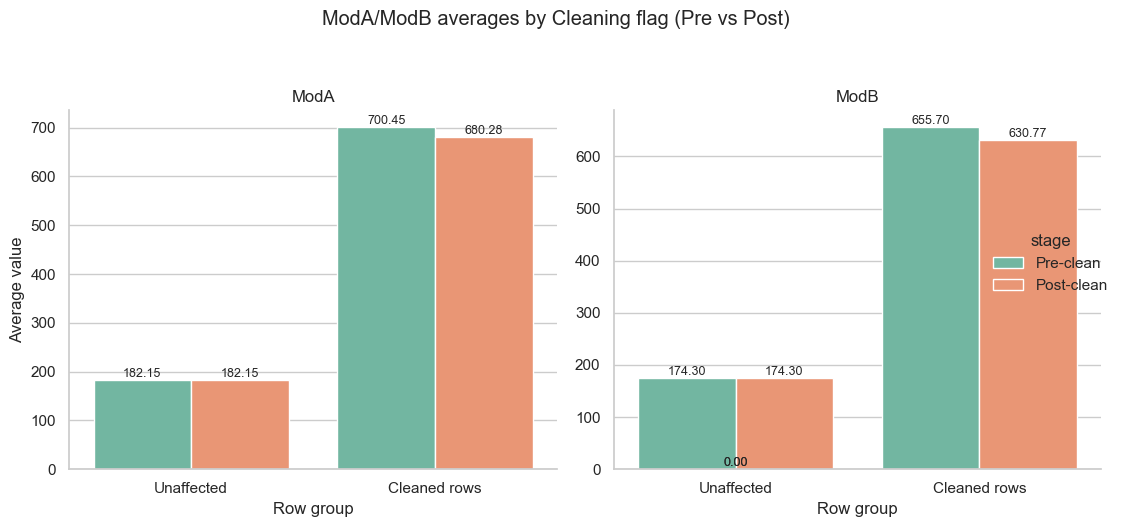

sensor         group       stage        mean
0   ModA    Unaffected   Pre-clean  182.150078
1   ModA    Unaffected  Post-clean  182.150078
2   ModA  Cleaned rows   Pre-clean  700.451061
3   ModA  Cleaned rows  Post-clean  680.279314
4   ModB    Unaffected   Pre-clean  174.302790
5   ModB    Unaffected  Post-clean  174.302790
6   ModB  Cleaned rows   Pre-clean  655.697028
7   ModB  Cleaned rows  Post-clean  630.766832

In [28]:
#Compute and plot averages by clean_flag (pre vs post)

# Tidy table for plotting
records = []
label_map = {False: "Unaffected", True: "Cleaned rows"}

for s in sensors:
    for flag_val, group_df in working.groupby("clean_flag"):
        grp = label_map.get(flag_val, str(flag_val))
        pre_mean = group_df[s + "_pre"].mean()
        post_mean = group_df[s + "_post"].mean()
        records.append({"sensor": s, "group": grp, "stage": "Pre-clean", "mean": pre_mean})
        records.append({"sensor": s, "group": grp, "stage": "Post-clean", "mean": post_mean})

impact = pd.DataFrame(records)

# Plot: one facet per sensor
g = sns.catplot(
    data=impact, x="group", y="mean", hue="stage",
    col="sensor", kind="bar", sharey=False, palette="Set2"
)
g.set_axis_labels("Row group", "Average value")
g.set_titles("{col_name}")
for ax in g.axes.flat:
    for p in ax.patches:
        h = p.get_height()
        ax.annotate(f"{h:.2f}", (p.get_x()+p.get_width()/2., h), ha='center', va='bottom', fontsize=9, rotation=0)
plt.suptitle("ModA/ModB averages by Cleaning flag (Pre vs Post)", y=1.05)
plt.tight_layout()
plt.show()

impact


In [29]:
#Correlation & Relationship Analysis

#Load cleaned data
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

clean_path = "../data/sierraleone_clean.csv"
clean_df = pd.read_csv(clean_path)

# Ensure numeric types for columns we’ll use
for c in ["GHI","DNI","DHI","TModA","TModB","Tamb","WS","WSgust","WD","RH"]:
    if c in clean_df.columns:
        clean_df[c] = pd.to_numeric(clean_df[c], errors="coerce")
    


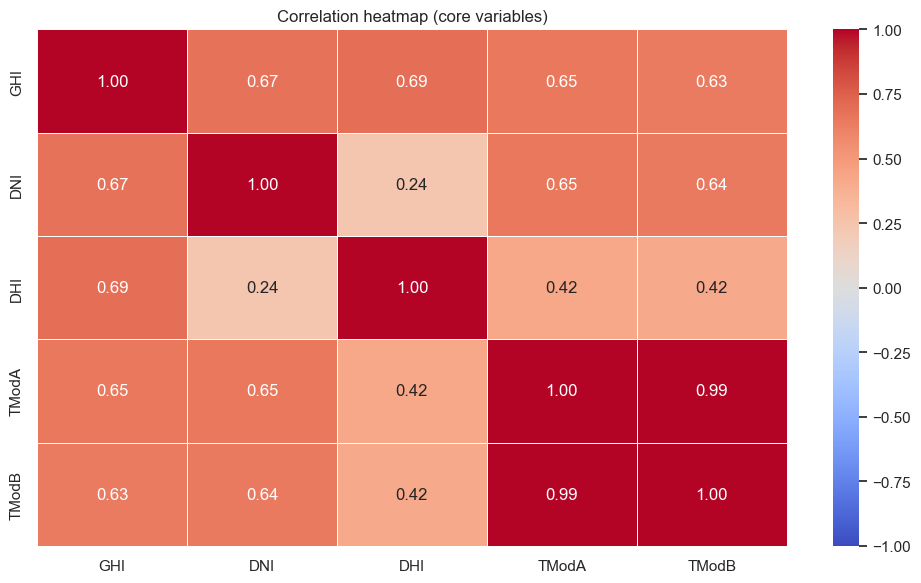

In [30]:
#Correlation heatmap (GHI, DNI, DHI, TModA, TModB)

core_cols = [c for c in ["GHI","DNI","DHI","TModA","TModB"] if c in clean_df.columns]

# Drop any columns with no variance to avoid NaNs in corr
core_cols = [c for c in core_cols if clean_df[c].nunique(dropna=True) > 1]

if len(core_cols) >= 2:
    corr = clean_df[core_cols].corr()
    sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", center=0, vmin=-1, vmax=1, linewidths=0.5)
    plt.title("Correlation heatmap (core variables)")
    plt.tight_layout(); plt.show()
else:
    print("Not enough core columns with data to compute correlation.")

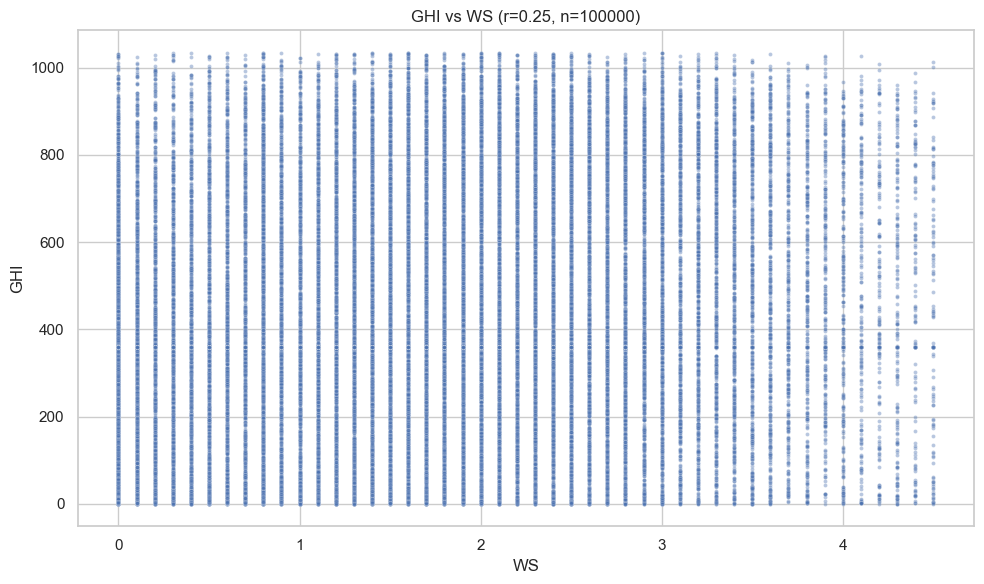

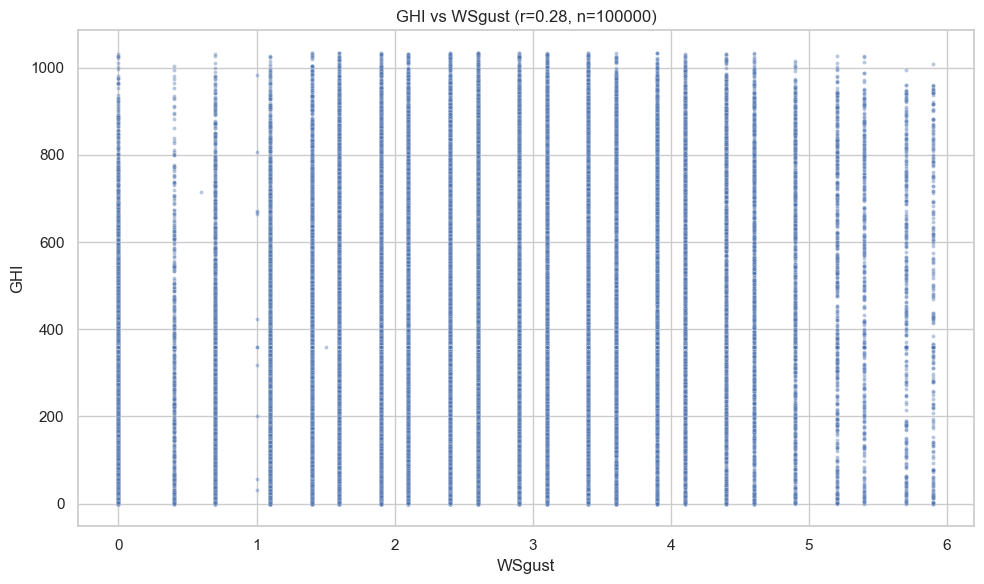

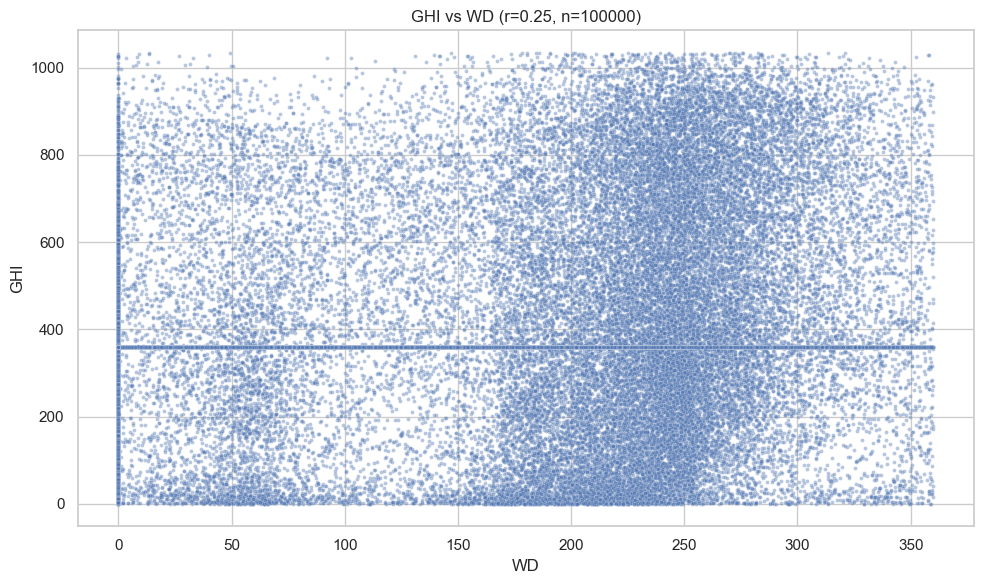

In [31]:
#Scatter plots: WS, WSgust, WD vs GHI

def scatter_with_r(df, x, y, sample_n=100000):
    data = df[[x, y]].dropna()
    if data.empty:
        print(f"Skipping {x} vs {y}: no data.")
        return
    if len(data) > sample_n:
        data = data.sample(sample_n, random_state=42)
    r = data[x].corr(data[y])
    sns.scatterplot(data=data, x=x, y=y, s=8, alpha=0.4)
    plt.title(f"{y} vs {x} (r={r:.2f}, n={len(data)})")
    plt.tight_layout(); plt.show()

if "GHI" in clean_df.columns:
    for x in ["WS", "WSgust", "WD"]:
        if x in clean_df.columns:
            scatter_with_r(clean_df, x, "GHI")
else:
    print("GHI not found; skipping WS/WSgust/WD vs GHI plots.")

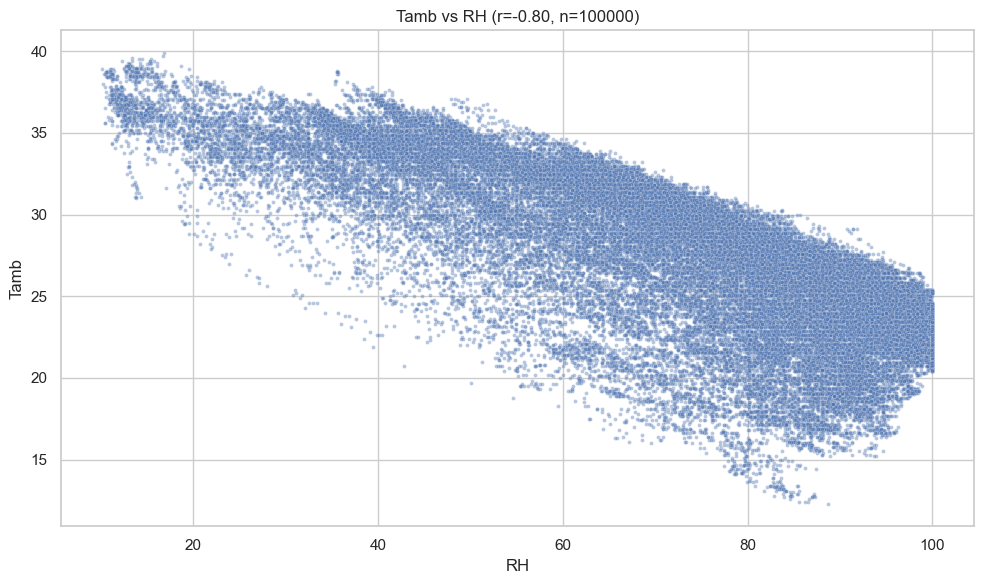

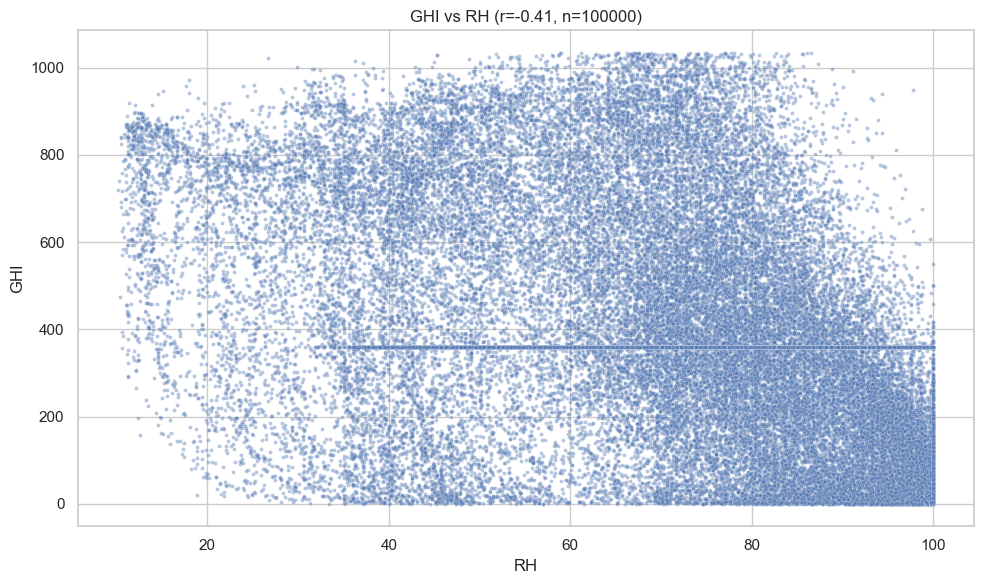

In [32]:
# RH relationships: RH vs Tamb and RH vs GHI

if "RH" in clean_df.columns and "Tamb" in clean_df.columns:
    scatter_with_r(clean_df, "RH", "Tamb")

if "RH" in clean_df.columns and "GHI" in clean_df.columns:
    scatter_with_r(clean_df, "RH", "GHI")

In [33]:
# Load cleaned data and prep wind columns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 5)

clean_path = "../data/sierraleone_clean.csv"
clean_df = pd.read_csv(clean_path)

# Ensure numeric types
for c in ["WS","WD","GHI","WSgust"]:
    if c in clean_df.columns:
        clean_df[c] = pd.to_numeric(clean_df[c], errors="coerce")

# Wind prep
if "WS" in clean_df.columns and "WD" in clean_df.columns:
    wind_df = clean_df[["WS","WD"]].dropna().copy()
    # WD within [0, 360)
    wind_df["WD"] = wind_df["WD"] % 360
    # Optional: ignore calms for rose (keep track to annotate)
    calm_threshold = 0.1
    calms_pct = (wind_df["WS"] <= calm_threshold).mean() * 100
    wind_valid = wind_df[wind_df["WS"] > calm_threshold]
    print(f"Wind samples: {len(wind_df):,}  |  Calms (<= {calm_threshold} m/s): {calms_pct:.1f}%")
else:
    raise ValueError("WS and/or WD not found in cleaned data. Make sure those columns exist.")

Wind samples: 525,600  |  Calms (<= 0.1 m/s): 36.5%


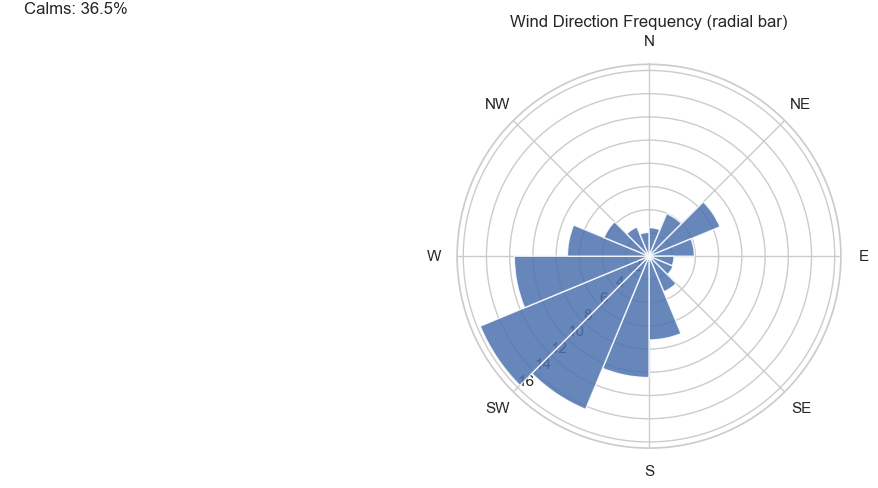

Tip: To install full wind rose support, run in a cell: %pip install windrose


In [ ]:
#Wind rose (uses windrose if installed; else simple radial frequency)

# Try windrose library
try:
    from windrose import WindroseAxes
    has_windrose = True
except Exception:
    has_windrose = False

if has_windrose:
    # Typical speed bins (m/s); adjust if your site is calmer/stronger
    speed_bins = [0, 1, 3, 5, 8, 11, 14, 20]
    ax = WindroseAxes.from_ax()
    ax.bar(
        wind_valid["WD"], wind_valid["WS"],
        bins=speed_bins, normed=True, opening=0.8, edgecolor="white", nsector=16
    )
    ax.set_legend(title="WS (m/s)")
    plt.title("Wind Rose (frequency by direction and speed)")
    # Annotate calms
    plt.annotate(f"Calms: {calms_pct:.1f}%", xy=(0.02, 0.95), xycoords="figure fraction")
    plt.show()
else:
    # Fallback: simple radial bar plot of directional frequency (no speed stacking)
    nsector = 16  # 16 sectors = 22.5° each
    dir_edges = np.linspace(0, 360, nsector + 1)
    counts, _ = np.histogram(wind_valid["WD"], bins=dir_edges)
    perc = counts / counts.sum() * 100.0
    theta_centers = np.deg2rad((dir_edges[:-1] + dir_edges[1:]) / 2.0)
    width = np.deg2rad(360 / nsector)

    ax = plt.subplot(111, polar=True)
    ax.set_theta_zero_location("N")
    ax.set_theta_direction(-1)
    bars = ax.bar(theta_centers, perc, width=width, bottom=0.0, color="C0", edgecolor="white", alpha=0.85)
    ax.set_title("Wind Direction Frequency (radial bar)")
    ax.set_xticks(np.deg2rad([0,45,90,135,180,225,270,315]))
    ax.set_xticklabels(["N","NE","E","SE","S","SW","W","NW"])
    ax.set_rlabel_position(225)
    plt.annotate(f"Calms: {calms_pct:.1f}%", xy=(0.02, 0.95), xycoords="figure fraction")
    plt.tight_layout(); plt.show()

    print("Tip: To install full wind rose support, run in a cell: %pip install windrose")

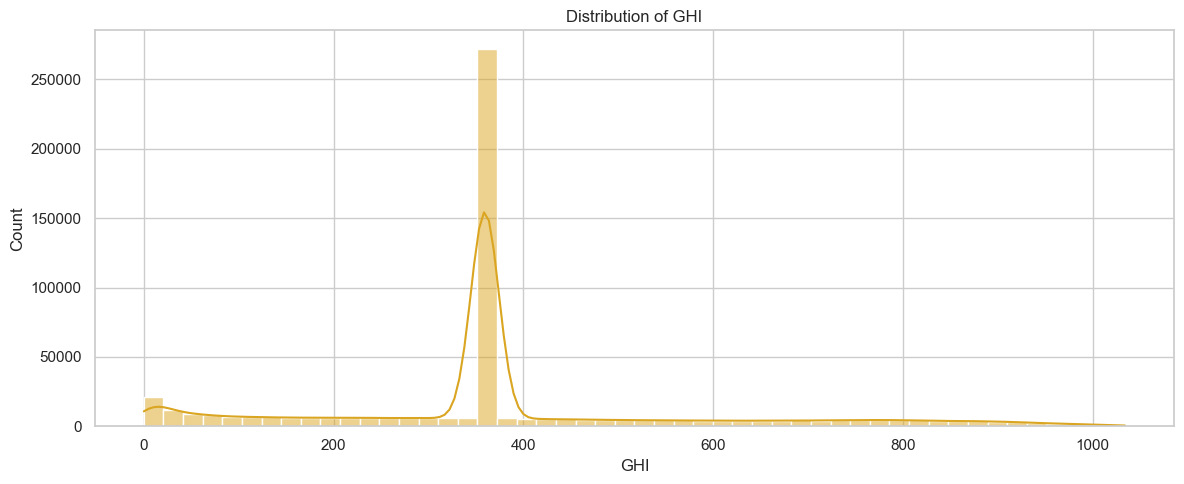

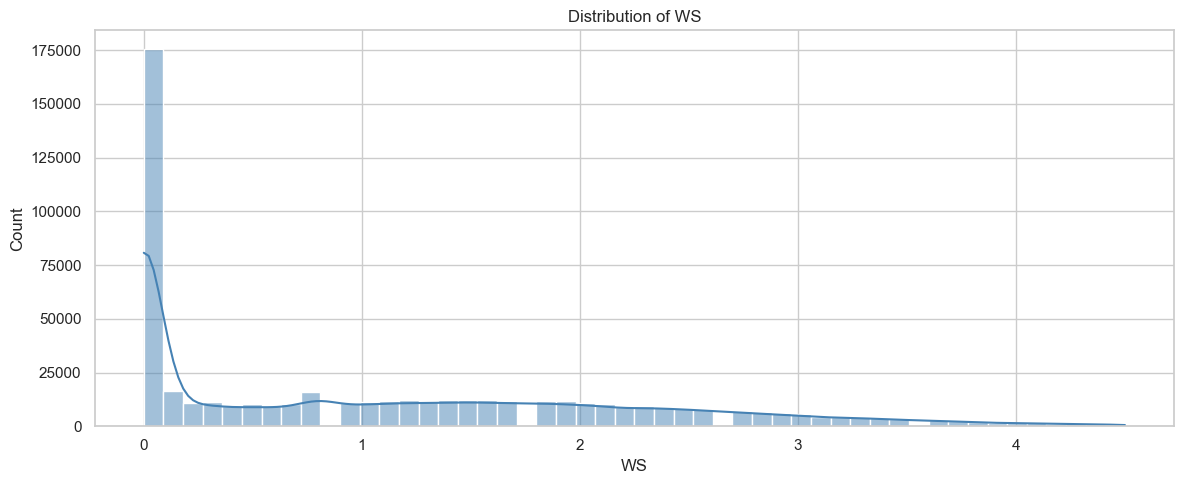

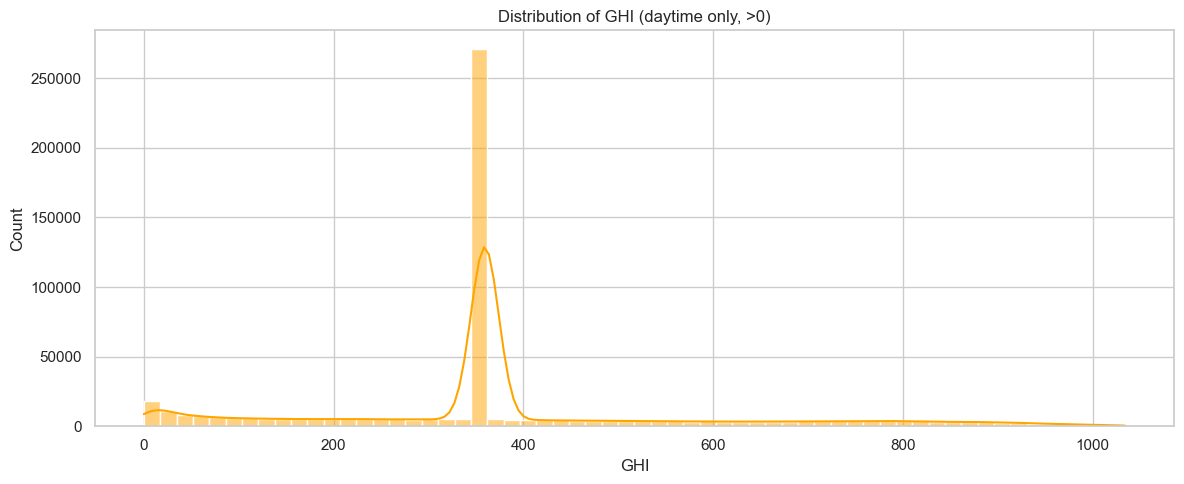

In [35]:
# Histograms for GHI and WS

# Choose GHI if available, otherwise try DNI/DHI
ghi_like = None
for c in ["GHI","DNI","DHI"]:
    if c in clean_df.columns:
        ghi_like = c
        break

plots = []
if ghi_like is not None:
    plots.append((ghi_like, "goldenrod"))
if "WS" in clean_df.columns:
    plots.append(("WS", "steelblue"))

for col, color in plots:
    sns.histplot(clean_df[col].dropna(), bins=50, kde=True, color=color)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col); plt.ylabel("Count")
    plt.tight_layout(); plt.show()

# Optional: zoomed-in GHI-only (positive values), if GHI exists
if ghi_like == "GHI":
    pos = clean_df["GHI"][clean_df["GHI"] > 0]
    if not pos.empty:
        sns.histplot(pos, bins=60, kde=True, color="orange")
        plt.title("Distribution of GHI (daytime only, >0)")
        plt.xlabel("GHI"); plt.ylabel("Count")
        plt.tight_layout(); plt.show()

In [36]:
#Temperature Analysis (RH influence on Tamb and GHI)

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 5)

clean_path = "../data/sierraleone_clean.csv"
clean_df = pd.read_csv(clean_path)

# Make sure types are numeric
for c in ["RH","Tamb","GHI","DNI","DHI"]:
    if c in clean_df.columns:
        clean_df[c] = pd.to_numeric(clean_df[c], errors="coerce")

# Parse time if present (useful for optional time-of-day views)
time_col = next((c for c in clean_df.columns if "time" in c.lower() or "date" in c.lower()), None)
if time_col:
    clean_df = clean_df.rename(columns={time_col: "Timestamp"})
    clean_df["Timestamp"] = pd.to_datetime(clean_df["Timestamp"], errors="coerce")

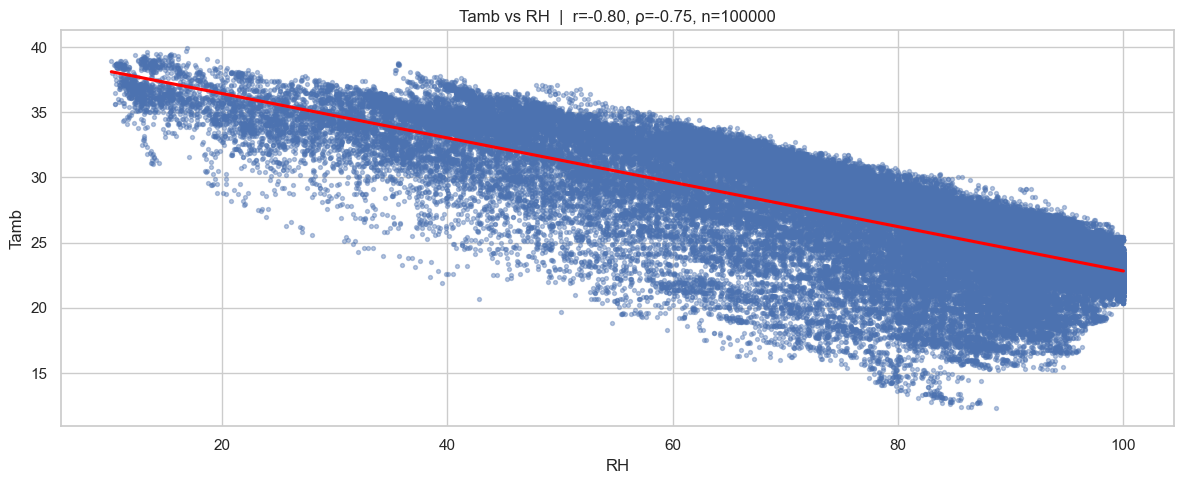

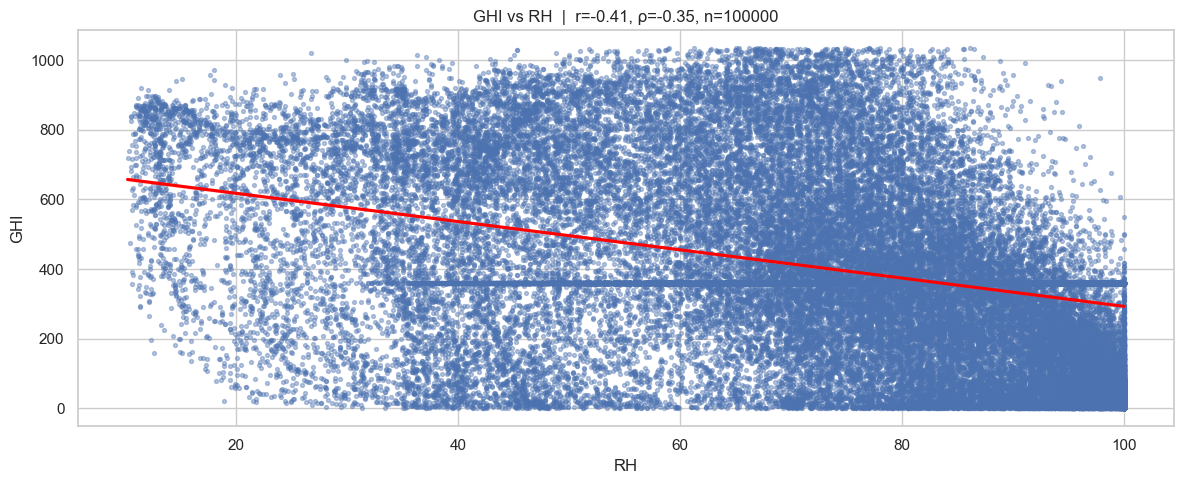

In [37]:
#Scatter + correlation: RH vs Tamb, RH vs GHI

def scatter_with_corr(df, x, y, sample_n=100000):
    data = df[[x, y]].dropna()
    if data.empty:
        print(f"Skipping {x} vs {y}: no data.")
        return
    if len(data) > sample_n:
        data = data.sample(sample_n, random_state=42)

    pearson = data[x].corr(data[y], method="pearson")
    spearman = data[x].corr(data[y], method="spearman")

    sns.regplot(data=data, x=x, y=y, scatter_kws=dict(s=8, alpha=0.4), line_kws=dict(color="red"))
    plt.title(f"{y} vs {x}  |  r={pearson:.2f}, ρ={spearman:.2f}, n={len(data)}")
    plt.tight_layout(); plt.show()

if "RH" in clean_df.columns and "Tamb" in clean_df.columns:
    scatter_with_corr(clean_df, "RH", "Tamb")

if "RH" in clean_df.columns and "GHI" in clean_df.columns:
    scatter_with_corr(clean_df, "RH", "GHI")

C:\Users\haymi\AppData\Local\Temp\ipykernel_17068\2733715330.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  g = tmp.groupby("RH_bin")[target].mean()


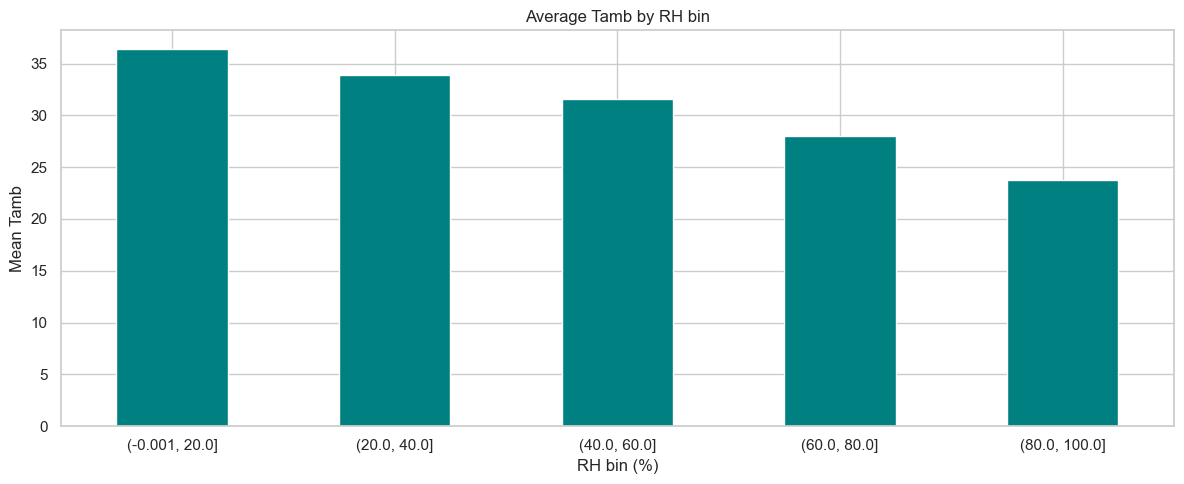

C:\Users\haymi\AppData\Local\Temp\ipykernel_17068\2733715330.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  g = tmp.groupby("RH_bin")[target].mean()


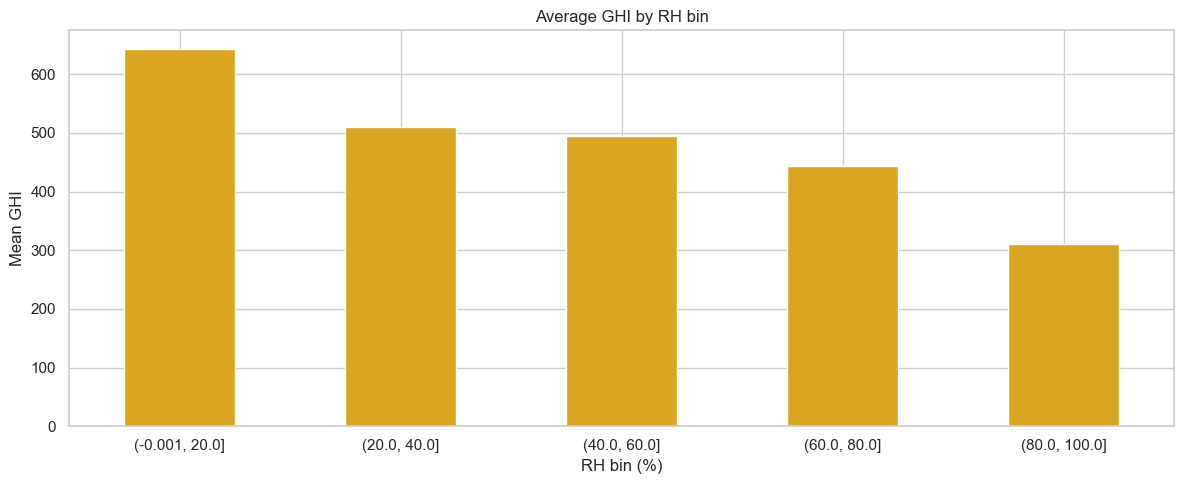

In [38]:
#RH bins → average Tamb and GHI

if "RH" in clean_df.columns:
    tmp = clean_df.copy()
    tmp["RH_bin"] = pd.cut(tmp["RH"], bins=[0,20,40,60,80,100], include_lowest=True)
    for target in [c for c in ["Tamb","GHI"] if c in tmp.columns]:
        g = tmp.groupby("RH_bin")[target].mean()
        g.plot(kind="bar", rot=0, color="teal" if target=="Tamb" else "goldenrod")
        plt.title(f"Average {target} by RH bin")
        plt.xlabel("RH bin (%)"); plt.ylabel(f"Mean {target}")
        plt.tight_layout(); plt.show()
else:
    print("RH not found — skipping RH bin analysis.")

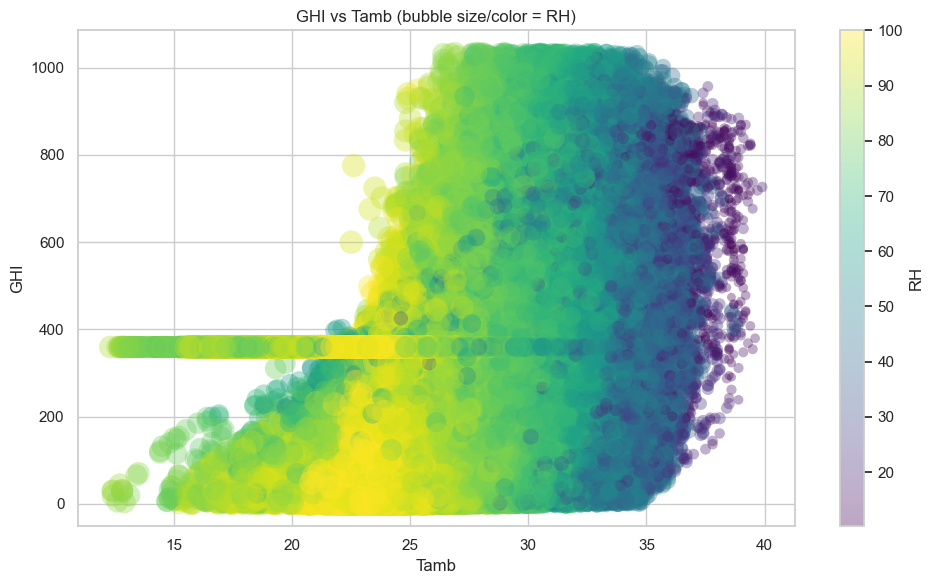

In [39]:
#GHI vs Tamb with bubble size = RH (fallback: BP)

# Decide bubble-size variable
size_col = "RH" if "RH" in clean_df.columns else ("BP" if "BP" in clean_df.columns else None)

if {"GHI","Tamb"}.issubset(clean_df.columns) and size_col is not None:
    data = clean_df[["GHI","Tamb", size_col]].dropna().copy()
    # Optional: focus on daytime to reduce zero-GHI clutter
    data = data[data["GHI"] >= 0]
    # Sample if huge
    if len(data) > 100000:
        data = data.sample(100000, random_state=42)

    s = data[size_col]
    sizes = 40 + 260 * (s - s.min()) / (s.max() - s.min() + 1e-9)

    plt.figure(figsize=(10,6))
    sc = plt.scatter(data["Tamb"], data["GHI"], s=sizes, c=s, cmap="viridis", alpha=0.35, edgecolors="none")
    cbar = plt.colorbar(sc); cbar.set_label(size_col)
    plt.xlabel("Tamb"); plt.ylabel("GHI")
    plt.title(f"GHI vs Tamb (bubble size/color = {size_col})")
    plt.tight_layout(); plt.show()
else:
    print("Missing required columns for bubble chart. Need GHI, Tamb, and RH or BP.")